## Notebook for baseline behavioral experiment
This notebook extracts `trx.mat` files for data of spontaneous behavioral experiments of motion on a plate, without any explicit stimuli.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Import custom modules
import src.data_loader as data_loader
import src.processor as processor

# Set matplotlib style
%matplotlib widget
%load_ext autoreload
%autoreload 2
plt.style.use('../anemotaxis.mplstyle')

## Load Baseline Behavioral Data

In [2]:
# Set the base path for baseline (no-gradient) data
baseline_base_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/2s1x600s0s#n#n#n"

# Find all date folders containing trx.mat files
def find_dates_in_base_path(base_path):
    date_paths = []
    for root, dirs, files in os.walk(base_path):
        if "trx.mat" in files:
            date_str = os.path.basename(root)
            if len(date_str) == 15 and date_str[8] == "_":
                date_paths.append({
                    'path': os.path.join(root, "trx.mat"),
                    'date_str': date_str
                })
    date_paths.sort(key=lambda x: x['date_str'])
    return date_paths

baseline_date_paths = find_dates_in_base_path(baseline_base_path)
print(f"Found {len(baseline_date_paths)} baseline dates with tracking data")

Found 3 baseline dates with tracking data


In [3]:
# Load and process all baseline data
def process_baseline_all_dates(base_path):
    date_paths = find_dates_in_base_path(base_path)
    if not date_paths:
        print("No baseline date folders with trx.mat found!")
        return None
    all_dates_data = {}
    for date_info in date_paths:
        date_str = date_info['date_str']
        trx_path = date_info['path']
        print(f"Processing {date_str}...")
        date_str, extracted_data, metadata = data_loader.process_single_file(trx_path, show_progress=True)
        filtered_data = processor.filter_larvae_by_duration(extracted_data, min_total_duration=300)
        filtered_data, stop_time_stats = processor.filter_larvae_by_excess_stop_time(
            filtered_data, max_stop_percentage=0.4
        )
        behavior_stats = processor.plot_behavior_duration_histograms(
            filtered_data, show_plot=False, using_frames=False
        )
        merged_data, merge_summary = processor.merge_short_stop_sequences(
            filtered_data, behavior_stats,
            min_stop_duration_cast=3.0, min_stop_duration_run=3.0
        )
        all_dates_data[date_str] = {
            'date_str': date_str,
            'raw_data': extracted_data,
            'filtered_data': filtered_data,
            'merged_data': merged_data,
            'behavior_stats': behavior_stats,
            'metadata': metadata
        }
    # Combine all dates together
    print("\nProcessing all baseline dates together...")
    all_data = data_loader.process_all_trx_files(base_path)
    filtered_all_data = processor.filter_larvae_by_duration(all_data, min_total_duration=300)
    filtered_all_data, exp_stop_stats = processor.filter_larvae_by_excess_stop_time(
        filtered_all_data, max_stop_percentage=0.4
    )
    behavior_stats_all = processor.plot_behavior_duration_histograms(
        filtered_all_data, show_plot=False, using_frames=False
    )
    merged_all_data, merge_summary_all = processor.merge_short_stop_sequences(
        filtered_all_data, behavior_stats_all,
        min_stop_duration_cast=4.0, min_stop_duration_run=4.0
    )
    all_dates_data['all_combined'] = {
        'date_str': 'All Combined',
        'raw_data': all_data,
        'filtered_data': filtered_all_data,
        'merged_data': merged_all_data,
        'behavior_stats': behavior_stats_all
    }
    return all_dates_data

baseline_all_dates_data = process_baseline_all_dates(baseline_base_path)

Processing 20250606_144416...

Processing file: /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/2s1x600s0s#n#n#n/20250606_144416/trx.mat
Number of larvae: 40


Processing larvae:   0%|          | 0/40 [00:00<?, ?it/s]

Excess stop time filtering results (threshold: 40%):
  - Removed 1 larvae with >40% time in stop state
  - 12 larvae remaining

Large Behaviors duration analysis (seconds) for Multiple Experiments
Number of larvae: 12
Total actions: 577

    Behavior   Events  %Total       Mean     Median        Std Above Mean  Above Med
-----------------------------------------------------------------------------------------------
         run:      259   44.9%      0.96       0.53       1.12        84        129
        cast:      251   43.5%      0.61       0.37       0.71        77        125
        stop:       50    8.7%      0.37       0.39       0.08        26         25
       hunch:        1    0.2%      0.42       0.42       0.00         0          0
      backup:       12    2.1%      0.58       0.42       0.36         4          6
        roll:        4    0.7%      0.87       0.92       0.17         3          2

Small Behaviors duration analysis (seconds) for Multiple Experiments
Number 

Processing larvae:   0%|          | 0/102 [00:00<?, ?it/s]

Excess stop time filtering results (threshold: 40%):
  - Removed 0 larvae with >40% time in stop state
  - 13 larvae remaining

Large Behaviors duration analysis (seconds) for Multiple Experiments
Number of larvae: 13
Total actions: 864

    Behavior   Events  %Total       Mean     Median        Std Above Mean  Above Med
-----------------------------------------------------------------------------------------------
         run:      350   40.5%      0.68       0.34       0.90        96        175
        cast:      440   50.9%      0.42       0.28       0.49       138        213
        stop:       55    6.4%      0.36       0.34       0.06        26         27
       hunch:       11    1.3%      0.13       0.11       0.07         4          5
      backup:        8    0.9%      0.34       0.34       0.13         3          4

Small Behaviors duration analysis (seconds) for Multiple Experiments
Number of larvae: 13
Total actions: 1437

    Behavior   Events  %Total       Mean     Medi

Processing larvae:   0%|          | 0/103 [00:00<?, ?it/s]

Excess stop time filtering results (threshold: 40%):
  - Removed 0 larvae with >40% time in stop state
  - 17 larvae remaining

Large Behaviors duration analysis (seconds) for Multiple Experiments
Number of larvae: 17
Total actions: 534

    Behavior   Events  %Total       Mean     Median        Std Above Mean  Above Med
-----------------------------------------------------------------------------------------------
         run:      192   36.0%      0.66       0.50       0.54        75         95
        cast:      303   56.7%      0.48       0.34       0.52        99        150
        stop:        8    1.5%      0.32       0.33       0.06         5          4
       hunch:        5    0.9%      0.27       0.25       0.10         2          2
      backup:       24    4.5%      0.48       0.39       0.22        10         12
        roll:        2    0.4%      0.62       0.62       0.00         1          1

Small Behaviors duration analysis (seconds) for Multiple Experiments
Number 

Processing trx files:   0%|          | 0/3 [00:00<?, ?it/s]


Processed 3 files
Total larvae: 245
Excess stop time filtering results (threshold: 40%):
  - Removed 1 larvae with >40% time in stop state
  - 42 larvae remaining

Large Behaviors duration analysis (seconds) for All Experiments
Number of larvae: 42
Total actions: 1975

    Behavior   Events  %Total       Mean     Median        Std Above Mean  Above Med
-----------------------------------------------------------------------------------------------
         run:      801   40.6%      0.77       0.44       0.92       251        400
        cast:      994   50.3%      0.49       0.33       0.57       313        497
        stop:      113    5.7%      0.36       0.34       0.07        54         56
       hunch:       17    0.9%      0.19       0.17       0.12         7          8
      backup:       44    2.2%      0.48       0.39       0.27        15         22
        roll:        6    0.3%      0.78       0.77       0.18         3          3

Small Behaviors duration analysis (seconds)

## Process and Filter Baseline Data
The above cell loads and processes the baseline data, applying filtering and merging steps as in the anemotaxis workflow.

## Plot Ethogram for Baseline Data

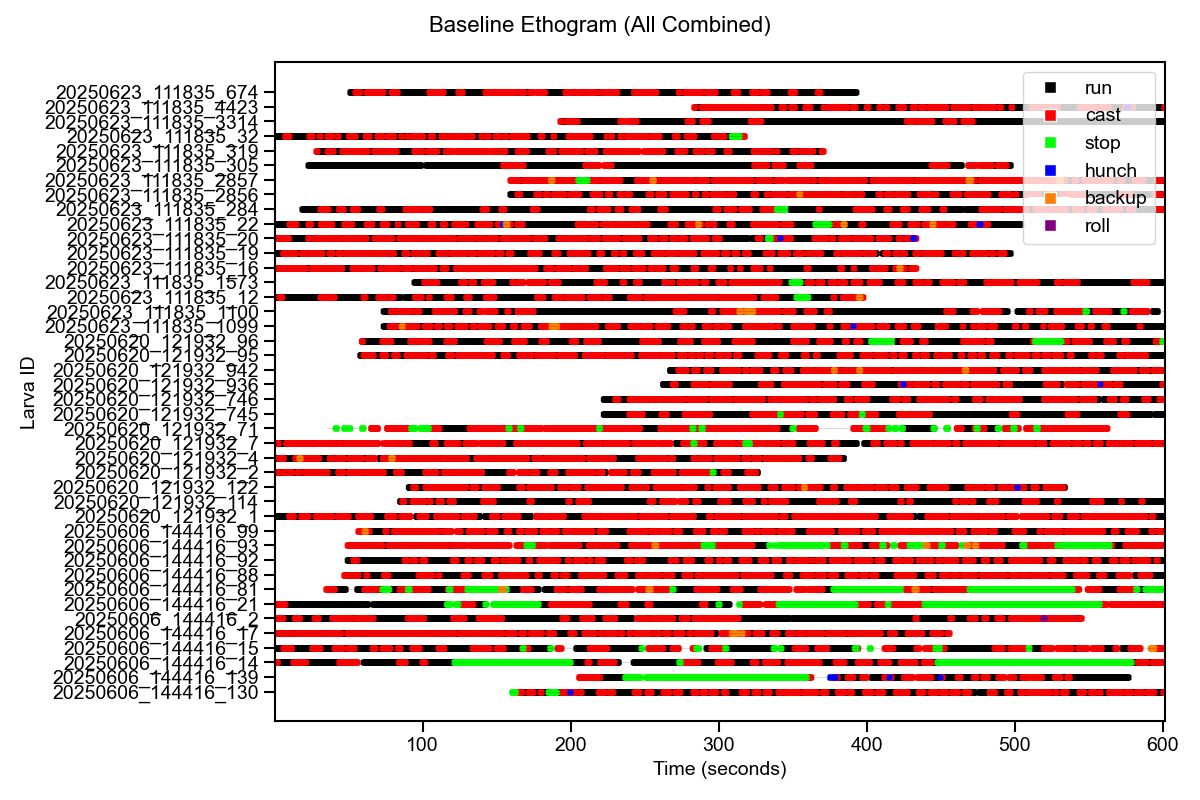

In [6]:
# Plot ethogram (global behavior matrix) for all combined baseline data
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Baseline Ethogram (All Combined)", fontsize=16)
gs = GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gs[0, 0])
processor.plot_global_behavior_matrix(
    baseline_all_dates_data['all_combined']['merged_data'],
    show_separate_totals=False, show_plot=True, ax=ax
)
plt.tight_layout()
plt.show()

## Plot Run Orientation Distribution (Baseline)

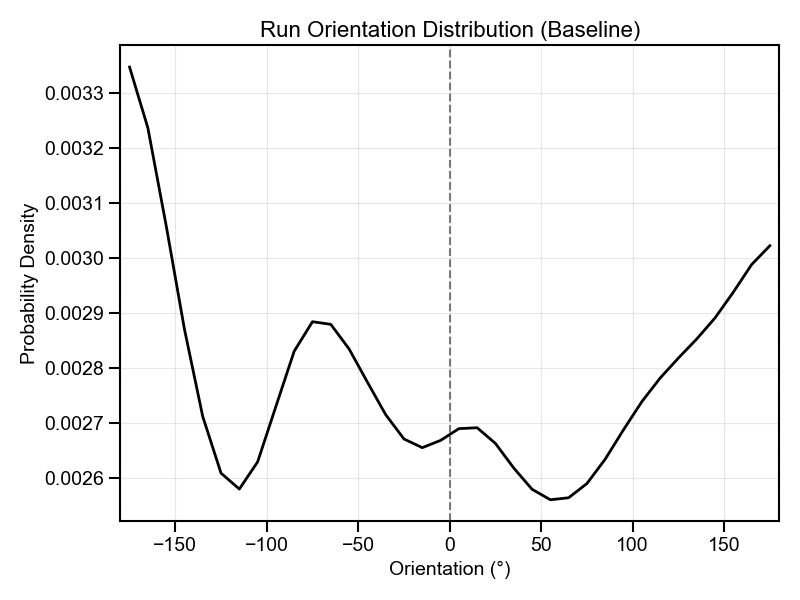

In [7]:
# Plot run orientation distribution for baseline data
fig, ax = plt.subplots(figsize=(8, 6))
processor.analyze_run_orientations_all(
    baseline_all_dates_data['all_combined']['merged_data'],
    show_plot=True, ax=ax
)
ax.set_title("Run Orientation Distribution (Baseline)")
plt.tight_layout()
plt.show()

## Plot Run Probability vs Orientation (Baseline)

TypeError: analyze_run_rate_by_orientation() got an unexpected keyword argument 'show_plot'

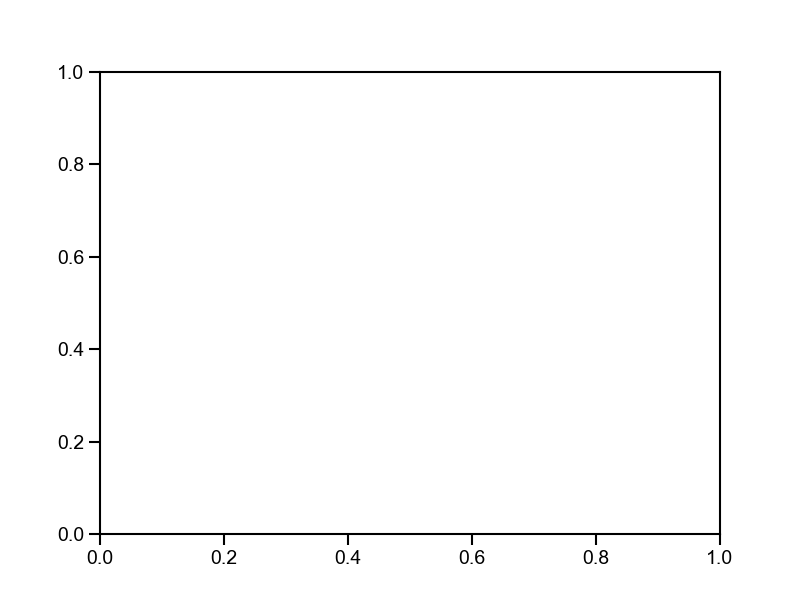

In [9]:
# Plot run probability vs orientation for baseline data
fig, ax = plt.subplots(figsize=(8, 6))
processor.analyze_run_rate_by_orientation(
    baseline_all_dates_data['all_combined']['merged_data'],
    bin_width=15, show_plot=False, ax=ax
)
ax.set_title("Run Probability vs Orientation (Baseline)")
plt.tight_layout()
plt.show()

## Plot Turn Rate vs Orientation (Baseline)

In [ ]:
# Plot turn rate vs orientation for baseline data
fig, ax = plt.subplots(figsize=(8, 6))
processor.analyze_turn_rate_by_orientation_true(
    baseline_all_dates_data['all_combined']['merged_data'],
    bin_width=15, show_plot=False, ax=ax
)
ax.set_title("Turn Rate vs Orientation (Baseline)")
plt.tight_layout()
plt.show()

## Plot Cast Orientation Analysis (Baseline)

In [ ]:
# Plot cast probability vs orientation for baseline data
fig, ax = plt.subplots(figsize=(8, 6))
processor.analyze_cast_orientations_all_true(
    baseline_all_dates_data['all_combined']['merged_data'],
    bin_width=15, show_plot=False, ax=ax
)
ax.set_title("Cast Probability vs Orientation (Baseline)")
plt.tight_layout()
plt.show()

## Plot Cast Amplitudes by Orientation (Baseline)

In [ ]:
# Plot mean cast amplitude by orientation for baseline data
fig, ax = plt.subplots(figsize=(8, 6))
processor.analyze_turn_amplitudes_by_orientation(
    baseline_all_dates_data['all_combined']['merged_data'],
    bin_width=15, show_plot=False, ax=ax
)
ax.set_title("Cast Amplitudes by Orientation (Baseline)")
plt.tight_layout()
plt.show()

## Plot Velocities by Orientation (Baseline)

In [ ]:
# Plot mean velocities (motion, head, tail) during run states by orientation for baseline data
fig, ax = plt.subplots(figsize=(8, 6))
processor.analyze_velocity_by_orientation(
    baseline_all_dates_data['all_combined']['merged_data'],
    bin_width=15, show_plot=False, ax=ax
)
ax.set_title("Velocities by Orientation (Baseline)")
plt.tight_layout()
plt.show()

## Plot Turn Rate Across Time (Baseline)

In [ ]:
# Plot turn rate (orientation-independent) across time for baseline data
fig, ax = plt.subplots(figsize=(8, 4))
processor.plot_turn_rate_over_time(
    baseline_all_dates_data['all_combined']['merged_data'],
    window=60, step=10, show_plot=False, ax=ax
)
ax.set_title("Turn Rate Across Time (Baseline)")
plt.tight_layout()
plt.show()

## Plot Run Probability Across Time (Baseline)

In [ ]:
# Plot run probability (orientation-independent) across time for baseline data
fig, ax = plt.subplots(figsize=(8, 4))
processor.plot_run_probability_over_time(
    baseline_all_dates_data['all_combined']['merged_data'],
    window=60, step=10, show_plot=False, ax=ax
)
ax.set_title("Run Probability Across Time (Baseline)")
plt.tight_layout()
plt.show()

## Plot Individual Larva Metrics Across Time (Baseline)

In [ ]:
# Plot each larva's metrics across absolute time for baseline data
processor.plot_individuals_over_time_absolute(
    baseline_all_dates_data['all_combined']['merged_data'],
    window=60, step=10, t_max=600, show_plot=True
)

## Plot Time in Run and Cast States (Baseline)

In [ ]:
# Plot total time spent in run and cast states for each larva (stacked bars)
processor.plot_time_in_run_and_cast_stacked(
    baseline_all_dates_data['all_combined']['merged_data'],
    show_plot=True
)